In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [91]:
#RTX、NOC、LMT、GD、BA為軍火商類股
#GSPC為S&P500
#DXF為美元指數
#CLF為 crude oil
#GCF為 黃金指數
#IRX 公債

portfolio = ['RTX', 'NOC', 'LMT', 'GD', 'BA', '^GSPC', 'DX=F', 'CL=F', 'GC=F', '^IRX']
list = ['RTX', 'NOC', 'LMT', 'GD', 'BA', 'SPX', 'DXF', 'CLF', 'GCF']
s = ['Stock', 'Stock', 'Stock', 'Stock', 'Stock', 'ETF', 'Future', 'Future', 'Future']
exchange = ['NYSE', 'NYSE', 'NYSE', 'NYSE', 'NYSE', 'NYSE', 'NYBOT', 'NYMEX', 'NYMEX']
lot = [1, 1, 1, 1, 1, 1, 1000, 1000, 100]
pd.set_option('display.float_format', lambda x:'%.2f' % x)


In [92]:
#設定查詢日期
end_time = '2022-05-21'
start_time = '2022-03-14'

In [93]:
#抓資料
RTX_df = yf.download(portfolio[0], start_time, end_time).round(2)
NOC_df = yf.download(portfolio[1], start_time, end_time).round(2)
LMT_df = yf.download(portfolio[2], start_time, end_time).round(2)
GD_df = yf.download(portfolio[3], start_time, end_time).round(2)
BA_df = yf.download(portfolio[4], start_time, end_time).round(2)
GSPC_df = yf.download(portfolio[5], start_time, end_time).round(2)
DXF_df = yf.download(portfolio[6], start_time, end_time).round(2)
CLF_df = yf.download(portfolio[7], start_time, end_time).round(2)
GCF_df = yf.download(portfolio[8], start_time, end_time).round(2)
IRX_df = yf.download(portfolio[9], start_time, end_time).round(2)

#這個List之後會用到
df_list = [RTX_df, NOC_df, LMT_df, GD_df, BA_df, GSPC_df, DXF_df, CLF_df, GCF_df]

#建立一個空的DataFame
record = pd.DataFrame(columns = 
['Date', 'Exchange' ,'Type' , 'Product', 'Price', 'Unit', 'Lot', 'Amount', 'Nominal Principal', 'Total Unit/Margin Balance', 'Cash Balance'])
#輸入2022-03-14基金開始時的初始交易
record.loc[0] = ['2022-03-14', 'NYSE', 'Buy_Stock', 'RTX', 97.17, 102912, 1,  97.17*102912, None, 102912, 0]
record.loc[1] = ['2022-03-14', 'NYSE', 'Buy_Stock', 'NOC', 439.3, 22763, 1,  439.3*22763, None, 22763, 0]
record.loc[2] = ['2022-03-14', 'NYSE', 'Buy_Stock', 'LMT', 449.44, 22249, 1,  449.44*22249, None, 22249, 0]
record.loc[3] = ['2022-03-14', 'NYSE', 'Buy_Stock', 'GD', 234.35, 42671, 1,  234.35*42671 , None, 42671, 0]
record.loc[4] = ['2022-03-14', 'NYSE', 'Buy_Stock', 'BA', 175.88, 56856, 1,  175.88*56856, None, 56856, 0]
record.loc[5] = ['2022-03-14', 'NYSE', 'Buy_ETF', 'SPX', 4202.75, 951, 1,  4202.75*951,  None, 951, 0]
record.loc[6] = ['2022-03-14', 'NYMEX', 'Buy_Future', 'CLF', 109.42, 910, 1000,  109.42*910*1000*0.2, 109.42*910*1000, 910, 0,]
record.loc[7] = ['2022-03-14', 'NYMEX', 'Buy_Future', 'GCF', 1976.5, 505, 100,  505*1976.5*100*0.2, 505*1976.5*100 ,505, 0,]
record.loc[8] = ['2022-03-14', 'NYBOT', 'Buy_Future', 'DXF', 98.88, 250, 1000,  250*98.88*1000*0.2, 250*98.88*1000, 250, 0,]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [94]:
CB = 100000000
for i in range(len(record)):
  T = record.iloc[i]['Type']
  Buy_list = ['Buy_Stock','Buy_ETF','Buy_Future']
  Sell_list = ['Sell_Stock', 'Sell_ETF', 'Sell_future']
  if T in Buy_list:
    CB = CB - record.iloc[i]['Amount']
    record.loc[i, 'Cash Balance'] = CB
  elif T in Sell_list:
    CB = CB + record.iloc[i]['Amount']
    record.loc[i, 'Cash Balance'] = CB
record = record.set_index('Date')

In [95]:
record

,Exchange,Type,Product,Price,Unit,Lot,Amount,Nominal Principal,Total Unit/Margin Balance,Cash Balance
Date,,,,,,,,,,
2022-03-14,NYSE,Buy_Stock,RTX,97.17,102912,1,9999959.04,None,102912,90000040.96
2022-03-14,NYSE,Buy_Stock,NOC,439.30,22763,1,9999785.90,None,22763,80000255.06
2022-03-14,NYSE,Buy_Stock,LMT,449.44,22249,1,9999590.56,None,22249,70000664.50
2022-03-14,NYSE,Buy_Stock,GD,234.35,42671,1,9999948.85,None,42671,60000715.65
2022-03-14,NYSE,Buy_Stock,BA,175.88,56856,1,9999833.28,None,56856,50000882.37
2022-03-14,NYSE,Buy_ETF,SPX,4202.75,951,1,3996815.25,None,951,46004067.12
2022-03-14,NYMEX,Buy_Future,CLF,109.42,910,1000,19914440.00,99572200.00,910,26089627.12
2022-03-14,NYMEX,Buy_Future,GCF,1976.50,505,100,19962650.00,99813250.00,505,6126977.12
2022-03-14,NYBOT,Buy_Future,DXF,98.88,250,1000,4944000.00,24720000.00,250,1182977.12


In [96]:
#每天淨資產與報酬率變動

#建立一個空的dataframe
return_df = pd.DataFrame(columns = ['Date', 'Net Asset Value', 'Rate of Return(%)'])
return_df = return_df.set_index('Date')

In [97]:
NAV_record = pd.DataFrame(columns = ['Date', 'RTX', 'NOC', 'LMT', 'GD', 'BA', 'SPX', 'DXF', 'CLF', 'GCF', 'Cash_Balance'])


def Return(Record):
  newdf = return_df
  #給定3/14個標的初始的持倉
  Unit = {'RTX_Unit': 102912	, 'NOC_Unit': 22763, 	'LMT_Unit':	22249, 'GD_Unit': 42671	, 'BA_Unit': 56856	, 'SPX_Unit':951	, 
          'CLF_Unit': 910, 'GCF_Unit': 505 ,'DXF_Unit': 250}
  Unit_list = ['RTX_Unit', 'NOC_Unit', 'LMT_Unit', 'GD_Unit', 'BA_Unit', 'SPX_Unit', 'DXF_Unit', 'CLF_Unit', 'GCF_Unit']
  #建立空dataframe
  df = pd.DataFrame(columns = ['Date', 'Net Asset Value', 'Rate of Return(%)'])
  #現金帳戶餘額初始為100000000元
  Cash_Balance = 0
  #判斷保證金帳戶餘額是否大於維持保證金


  #找出weekday
  
  business_day = pd.date_range(start = start_time, end = end_time, freq = 'b')
  business_day = business_day.drop(pd.to_datetime('2022-04-15'))
  Value = 0
  #比對每個weekday是否有交易，若有則更新標的持倉
  for d in range(len(business_day)):
    add_value = []
    date = str(business_day[d]).split(' ')[0]
    add_value.append(date)
    grouped = Record.groupby('Date')
    try:
      #抓出分組名單
      G = grouped.get_group(date)
      #每筆交易做的標的是甚麼
      for g in range(len(G)):
        for s in range(len(list)):
          if G.iloc[g]['Product'] == list[s]:
            Unit[Unit_list[s]] = G.iloc[g]['Total Unit/Margin Balance']
            Cash_Balance = G.iloc[g]['Cash Balance']
          else:
            continue
    except:
      pass
    
    #計算Net Asset Value
    Net_Asset_Value = 0
    #股票
    for n in range(6):
      new_value = Unit[Unit_list[n]] * df_list[n].loc[date]['Close'] * lot[n]
      add_value.append(new_value)
      Net_Asset_Value = Net_Asset_Value + new_value
    Net_Asset_Value = Net_Asset_Value + Cash_Balance
    #期貨
    for n in range(3):
      c = n + 6
      for i in range(len(G)):
        if G.iloc[i]['Product'] == list[c]:
          a = i
          new_value = G.iloc[a]['Amount'] + Unit[Unit_list[c]] * df_list[c].loc[date]['Close']*lot[c] - G.iloc[a]['Nominal Principal']
          add_value.append(new_value)
          Net_Asset_Value = Net_Asset_Value + new_value
    add_value.append(Cash_Balance)
    NAV_record.loc[d] = add_value
    if d == 0:
      c = (Net_Asset_Value-100000000)/100000000
      Rate_of_Return = c *100
    elif d > 0:
      #計算報酬率並 *100 使期單位為百分比
      c = (Net_Asset_Value - df.iloc[d-1]['Net Asset Value'])/df.iloc[d-1]['Net Asset Value']
      Rate_of_Return = c * 100
    #更新當日資料至dataframe
    df.loc[d] = [date, Net_Asset_Value, Rate_of_Return]
  df = df.set_index('Date')
  newdf = newdf.append(df)
  final_list = [newdf]
  NAV = NAV_record.set_index('Date')
  final_list.append(NAV)
  return final_list

In [98]:
#基金總淨值
list = Return(record)
list[0]

,Net Asset Value,Rate of Return(%)
Date,,
2022-03-14,93166461.77,-6.83
2022-03-15,86456620.86,-7.20
2022-03-16,82893980.76,-4.12
2022-03-17,92380121.45,11.44
2022-03-18,93398813.96,1.10
2022-03-21,101073113.75,8.22
2022-03-22,100921354.77,-0.15
2022-03-23,104476292.56,3.52
2022-03-24,104040426.28,-0.42


In [99]:
#基金淨值名細
list[1]

,RTX,NOC,LMT,GD,BA,SPX,DXF,CLF,GCF,Cash_Balance
Date,,,,,,,,,,
2022-03-14,9986580.48,10048043.46,9888568.05,9977759.93,9979365.12,3968627.61,4944000.00,14081340.00,19109200.00,1182977.12
2022-03-15,10046269.44,10193726.66,9982458.83,10139483.02,10227825.84,4053589.95,4989000.00,8102640.00,17538650.00,1182977.12
2022-03-16,9858969.60,9661300.09,9374393.66,9715759.99,10745215.44,4144324.86,4879000.00,6828640.00,16503400.00,1182977.12
2022-03-17,10059648.00,9760774.40,9535698.91,9836092.21,10813442.64,4195498.17,4716500.00,14054040.00,18225450.00,1182977.12
2022-03-18,10035978.24,9741425.85,9482078.82,9824144.33,10963542.48,4244427.12,4781500.00,15619240.00,17523500.00,1182977.12
2022-03-21,10285025.28,10165955.80,9789560.00,10073342.97,10569530.40,4242582.18,4849000.00,22371440.00,17543700.00,1182977.12
2022-03-22,10433218.56,10159126.90,9802686.91,10148443.93,10861770.24,4290541.11,4854000.00,22043840.00,17144750.00,1182977.12
2022-03-23,10417781.76,10173239.96,9906367.25,10227811.99,10577490.24,4237884.24,4876500.00,24928540.00,17947700.00,1182977.12
2022-03-24,10467179.52,10347376.91,10006042.77,10283711.00,10748626.80,4298672.16,4924000.00,22571640.00,19210200.00,1182977.12


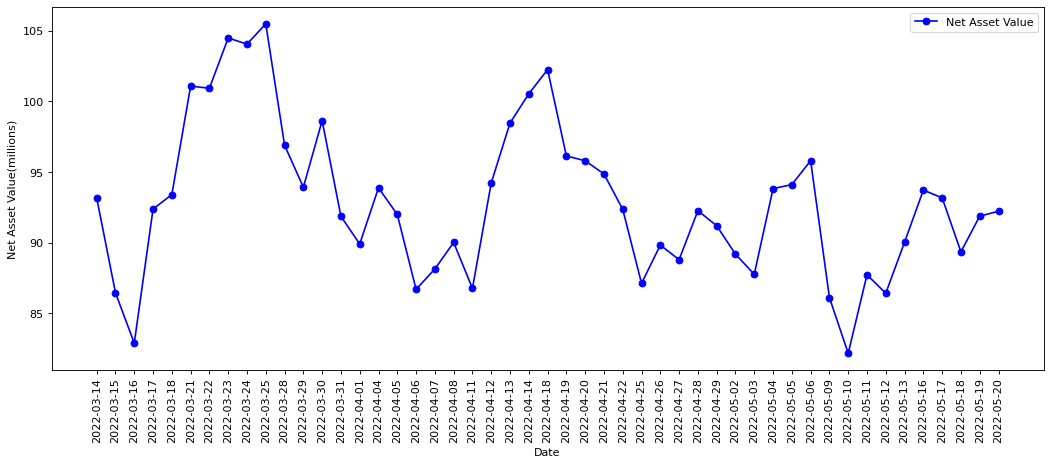

In [101]:
def picture(df):
  x = df.index
  y = df['Net Asset Value']/1000000
  #figsize = (16, 6)
  plt.figure(figsize = (16, 6), dpi = 80)
  plt.xticks(rotation = 90)
  plt.plot(x, y, 'ro-', label='Net Asset Value', color = 'b')
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Net Asset Value(millions)')
  plt.savefig('Fund_NAV_pic.png')
  return
picture(list[0])

In [103]:
#輸出基金每天淨值
list[0].to_excel('fund_NAV.xlsx')

In [104]:
#輸出基金每日淨值明細表
list[1].to_excel('every_asset_NAV.xlsx')